# Screen Time in Daily life

## 1. Introduction

* My project domain is the iPhone's built in screen time recording feature. The dataset I am using spans from February 13 to April 14 2022. The dataset consists of the date, total screen time, social, information and reading, entertainment, productivity and finance, and other for screen time data. The data is shown in minutes, and the day of the week is encorportated into the dataset. 

* My main hypothesis is that Friday and Saturday will have the most total screen time average.

a. The iPhone data recording domain is important to me because the iPhone is somewhat known for its security. I wanted to research this domain to see if it really is as secure as people think, and I wanted to see if they were giving my screen time data away, or specific app screen time data away. 

b. The dataset format is in CSV

c. Table 1 is the date and screen time data, and table 2 is the date and day of the week data. 
* i. The data for each table was typed into google sheets manually, however my phone automatically recorded all the screen time data in the settings app. The day of the week data was collected manually
* ii. both tables have 61 instances exactly.

d. 

e.

### narrative describing the input and the code

In [14]:
import pandas as pd

phone_df = pd.read_csv("phone_data.csv", index_col = 0)
days_week_df = pd.read_csv("days_of_week.csv", index_col=0)

start_date = input("Enter start Date: ")
end_date = input("Enter end date: ") 

date_select = pd.DataFrame(phone_df.loc[start_date:end_date])
print(date_select)

user_selected_stat = input('Please choose a column from the above stats: ')
stat_series = pd.Series(date_select[user_selected_stat])

sum = stat_series.sum()
mean = stat_series.mean()
std = stat_series.std()
median = stat_series.median()
min = stat_series.min()
max = stat_series.max()

print()
print("You chose:", user_selected_stat, "which is shown below with the corresponding dates")

print(stat_series)


         Screen Time Total (minutes)  Social (minutes)  \
Date                                                     
3/24/22                          402               160   
3/25/22                          421               156   
3/26/22                          430               216   
3/27/22                          322               215   
3/28/22                          194                77   
3/29/22                          220               122   
3/30/22                          266                88   
3/31/22                          338               158   
4/1/22                           428               232   
4/2/22                           411               184   
4/3/22                           452               194   
4/4/22                           394               105   
4/5/22                           344               136   
4/6/22                           162                97   
4/7/22                           310                78   
4/8/22        

,Screen Time Total (minutes),Social (minutes),Information & Reading (Minutes),Other (minutes),Entertainment (minutes),Productivity and Finance
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,321.409836,155.278689,33.245902,19.934426,90.032787,22.918033
std,75.028967,51.529969,32.507771,23.522237,53.212770,23.307578
min,155.000000,45.000000,0.000000,0.000000,14.000000,0.000000
25%,285.000000,122.000000,12.000000,2.000000,39.000000,7.000000
50%,330.000000,156.000000,20.000000,11.000000,81.000000,16.000000
75%,377.000000,201.000000,43.000000,32.000000,137.000000,37.000000
max,452.000000,252.000000,124.000000,92.000000,191.000000,131.000000


### narrative describing the output and your insights

In [13]:
stats_dict = {'Stats':['Sum', 'Mean','Std Deviation','Median','Min','Max'], 'Number': [sum, mean, std, median, min, max]}
stats_dict_df = pd.DataFrame(stats_dict)

stats_dict_df.to_csv("output_phone_data.csv", header = False, index = False, float_format = "%.2f")

merged_df = phone_df.merge(days_week_df, on=["Date"], how = 'outer')
merged_df.to_csv("data_merged_df.csv")

grouped_by_day = merged_df.groupby("Day of Week", sort = False)


mean_user_ser = pd.Series(dtype=float)

for group_name, date_select in grouped_by_day:
    group_mean_pop = date_select[user_selected_stat].mean()
    mean_user_ser[group_name] = group_mean_pop
mean_user_ser.name = "Mean per day of the week:", user_selected_stat

print()
print("And here is the average number of", user_selected_stat, "for each day of the week")
print()
print(mean_user_ser)



And here is the average number of Social (minutes) for each day of the week

Sunday       169.777778
Monday       134.000000
Tuesday      171.555556
Wednesday    132.333333
Thursday     136.444444
Friday       183.875000
Saturday     163.000000
Name: (Mean per day of the week:, Social (minutes)), dtype: float64


<AxesSubplot:xlabel='Date'>

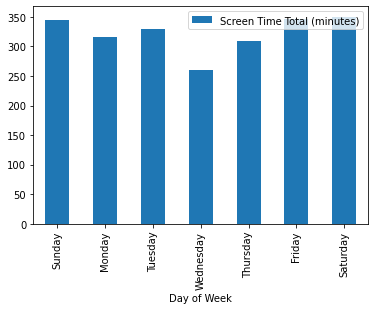

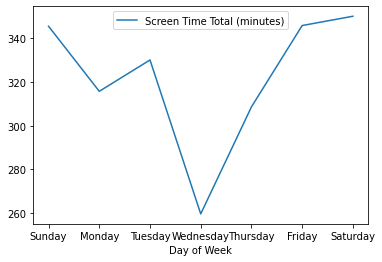

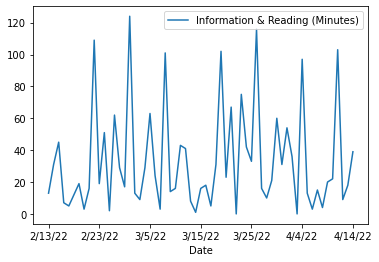

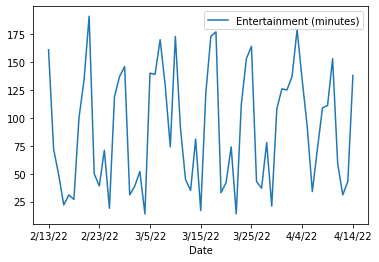

In [60]:
import matplotlib as plt
import pandas as pd

phone_df = pd.read_csv("phone_data.csv", index_col = 0)
days_week_df = pd.read_csv("days_of_week.csv")
merged_df = phone_df.merge(days_week_df, on=["Date"], how = 'outer')

merged_df[['Day of Week', 'Screen Time Total (minutes)']].groupby('Day of Week', sort=False).mean().plot(kind='bar', legend=True)

merged_df[['Day of Week', 'Screen Time Total (minutes)']].groupby('Day of Week', sort=False).mean().plot(kind='line', legend=True)

merged_df[['Date', 'Information & Reading (Minutes)']].groupby('Date', sort=False).mean().plot(kind='line', legend=True)

merged_df[['Date', 'Entertainment (minutes)']].groupby('Date', sort=False).mean().plot(kind='line', legend=True)




In [17]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
phone_df = pd.read_csv("phone_data.csv")
days_week_df = pd.read_csv("days_of_week.csv")
merged_df = phone_df.merge(days_week_df, on=["Date"], how = 'outer')

X_train = phone_df.drop("Date", axis=1)
y_train = phone_df["Date"]

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_normalized = scaler.transform(X_train)

from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_normalized, y_train)

X_test = pd.Series([340, 150, 25, 5, 120, 15], index=phone_df.columns.drop("Date"))
X_test = scaler.transform([X_test])
y_test_prediction = neigh.predict(X_test)
print(y_test_prediction)

['2/27/22']


In [3]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from sklearn import neighbors, datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

phone_df = pd.read_csv("phone_data.csv")
days_week_df = pd.read_csv("days_of_week.csv")
merged_df = phone_df.merge(days_week_df, on=["Date"], how = 'outer')

merged_df = merged_df.drop("Date", axis=1)

X_train = merged_df.drop("Day of Week", axis=1)
y_train = merged_df["Day of Week"]

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_normalized = scaler.transform(X_train)

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_normalized, y_train)

X_test = pd.Series([340, 150, 25, 5, 120, 15], index=merged_df.columns.drop("Day of Week"))
X_test = scaler.transform([X_test])
y_test_prediction = neigh.predict(X_test)
print(y_test_prediction)

['Sunday']
0.9777777777777777
[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]


In [5]:
iris = datasets.load_iris() 
X, y = iris.data[:, :], iris.target
x_train, x_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 0, train_size = 0.7)

scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
y_predicted = knn.predict(x_test)

print(accuracy_score(y_test, y_predicted))
print(confusion_matrix(y_test, y_predicted))

0.9777777777777777
[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]


Tree!


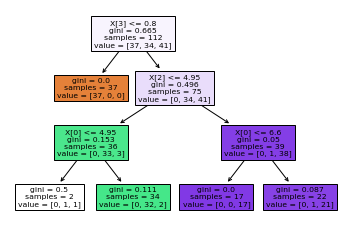

In [23]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

clf = DecisionTreeClassifier(max_depth = 3, max_features = 0.65, splitter='best')
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

tree.plot_tree(clf, max_depth = 3, filled = True)
print("Tree!")